In [1]:
%load_ext autoreload
%autoreload 2

from src.model import Model, loss_function
from src.data_loader import DataLoader
from src.create_dataset import read_img

## Load dataset

In [2]:
top_k = 3000
data_path = '/data/Niklas/Flickr30k'
dataLoader = DataLoader(data_path)
dataLoader.convert_to_dataset(top_k)
if len(dataLoader.tokenizer.index_word) < top_k:
    top_k = len(dataLoader.tokenizer.index_word) - 1 # If our dictonary is less than top_k. -1 because <unk> is included
    dataLoader.top_k = top_k
max_length = dataLoader.max_length

## Create models

In [3]:
image_shape = (299,299,3)
embedding_matrix = None
embedding_dim = 512
lstm_units = embedding_dim

model = Model(image_shape, embedding_dim, lstm_units, top_k, max_length)
model.load_weights('./Saved_models/20201117-204240/model')

## Inference

a belly dancing girl with <unk> boots on next to her bicycle while a boy stares from behind
a man in a red shirt and blue jeans is riding a unicycle
<start> A young girl rides a unicycle next to another riding a scooter on a busy street. <end>
<start> The girl on the unicycle reaches out for the child on the scooter. <end>
<start> A girl rides a unicycle as another rides a scooter next to her. <end>
<start> A girl rides a unicycle with a child who rides a scooter. <end>
<start> There is a girl on a unicycle and a child on a scooter. <end>


[None, None, None, None, None]

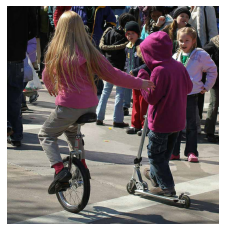

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
idx = np.random.randint(len(dataLoader.img_name_train))
sample = dataLoader.img_name_train[idx]
cap = dataLoader.org_data[sample]
img = read_img(sample)

img_1 = tf.io.read_file(sample)
img_1 = tf.image.decode_jpeg(img_1, channels=3)
plt.imshow(img_1)
plt.axis('off')

result_sampling = model.predict(img[None,...], dataLoader.tokenizer, 'sampling')
result_greedy = model.predict(img[None,...], dataLoader.tokenizer, 'greedy')
print(' '.join(result_sampling))
print(' '.join(result_greedy))

[print(c) for c in cap]

two men wearing white <unk> and hard hats scaling a <unk> treat
a man in a wetsuit is surfing on a large wave
<start> A person is standing in water with it splashing all around them while another person lingers in the background. <end>
<start> A child is splashing in the water at the beach. <end>
<start> A girl is playing in the ocean at dusk. <end>
<start> Two children playing in the surf. <end>
<start> A kid splashes in the ocean. <end>


[None, None, None, None, None]

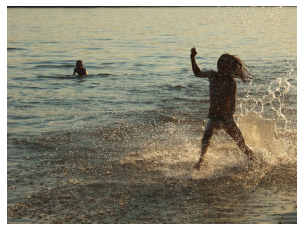

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
idx = np.random.randint(len(dataLoader.img_name_val))

sample = dataLoader.img_name_val[idx]
cap = dataLoader.org_data[sample]
img = read_img(sample)

img_1 = tf.io.read_file(sample)
img_1 = tf.image.decode_jpeg(img_1, channels=3)
plt.imshow(img_1)
plt.axis('off')

result_sampling = model.predict(img[None,...], dataLoader.tokenizer, 'sampling')
result_greedy = model.predict(img[None,...], dataLoader.tokenizer, 'greedy')
print(' '.join(result_sampling))
print(' '.join(result_greedy))

[print(c) for c in cap]